In [59]:
%run /home/grg/git/alfa/nilearn-helper.py
%run /home/grg/git/alfa/roicollect.py
from scipy import stats
import scipy

    #sns.boxplot(x='group', y='roi', data=df, showfliers=False)
    #plt.show()

labels = [e for e in json.load(open('/tmp/sulci_list.txt')) if 'left' in e]
groups_names = ['HO','All']
keys = ['label', 'thickness_mean', 'thickness_std', 'CSF_volume', 'GM_volume', 'mean_depth', 'maxdepth', 'mindepth', 'size', 'opening']

key = keys[-1]
print key

data = pd.read_excel('/home/grg/ALFA_sulci_left.xls')
data = data.set_index(data['subject'])
del data['subject']
tiv = json.load(open('/home/grg/spm/data/tiv.json'))
tiv = pd.DataFrame(tiv.items(), index=[string.atoi(e) for e in tiv.keys()], columns=['subject', 'tiv'])
#del tiv['subject']
data = data.join(tiv)
data['%s_corr'%key] = data[key] / data['tiv']

for label in labels[:]:
    df = data[data['label']==label]
    groups = get_groups(df, groups_names)
    box = [e['%s_corr'%key].tolist() for e in groups]
    
    
    grp = []
    for i, each in enumerate(groups):
        each['group'] = len(each['apo']) * [groups_names[i]]
        grp.append(each)
    df = pd.concat(grp)
    
    T = scipy.stats.ttest_ind(df[df['group']==groups_names[0]]['%s_corr'%key],
            df[df['group']==groups_names[1]]['%s_corr'%key])
    print label, T.pvalue
    if T.pvalue>0.05: continue #print '!!!!!!!'
    #print stats.shapiro(box[0])[1], stats.shapiro(box[1])[1], stats.shapiro(box[2])[1]
    #print label
    if np.mean(box[0]) > np.mean(box[1]): # and np.mean(box[1]) > np.mean(box[2]):
        print label, 'HO>All' #HT>NC !'
        print np.mean(box[0]), np.mean(box[1])#, np.mean(box[2])
        print ''
    if np.mean(box[1]) > np.mean(box[0]):# and np.mean(box[1]) > np.mean(box[0]):
        print label, 'All>HO' #NC>HT>HO !'
        print np.mean(box[0]), np.mean(box[1])#, np.mean(box[2])
        print ''
    
#for label in labels[:]:
    #df = data[data['label']==label]
    #groups = get_groups(df, groups_names)
    #box = [e['%s_corr'%key].tolist() for e in groups]

    #plt.boxplot(box, labels=groups_names)
    #plt.show()
    
    sns.violinplot(x='group', y='%s_corr'%key, data=df) #, showfliers=False)

    plt.show()


opening


KeyError: 'opening'

S.GSM._left
[[ 1.         -0.03999153]
 [-0.03999153  1.        ]]


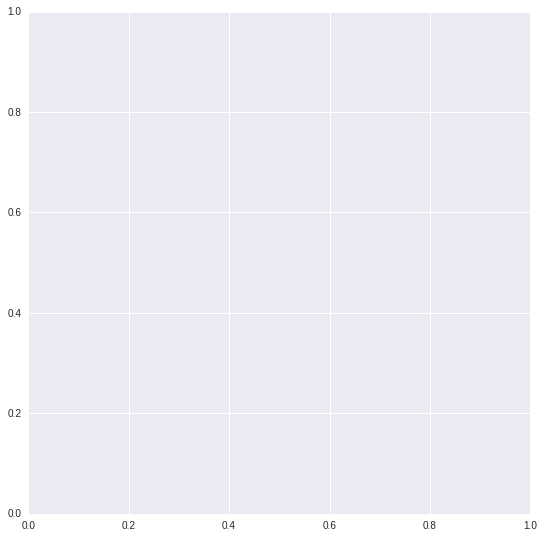

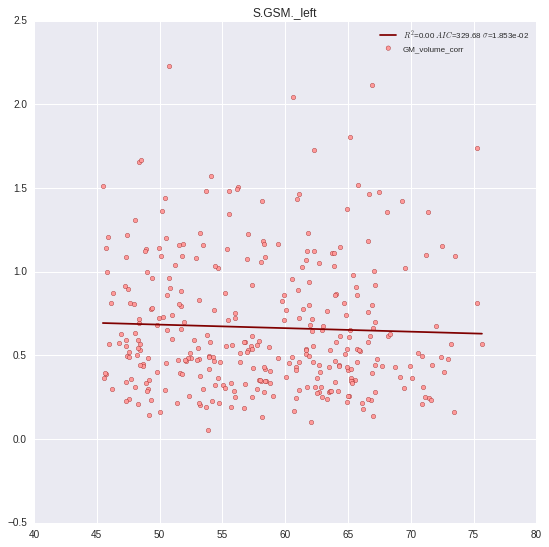

S.F.inter._left
[[ 1.          0.04173389]
 [ 0.04173389  1.        ]]


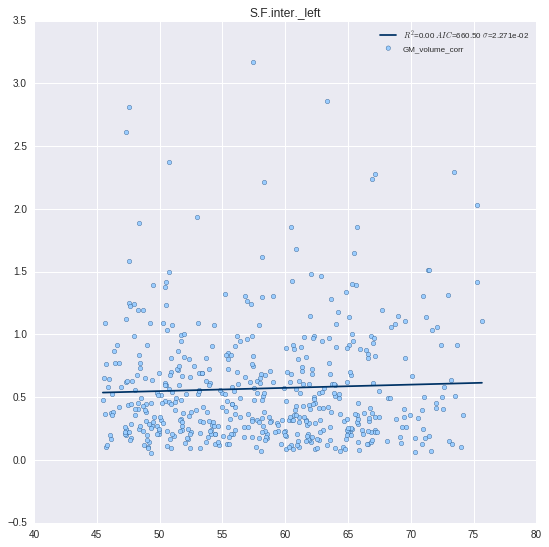

ventricle_left
[[ 1.         -0.02448969]
 [-0.02448969  1.        ]]


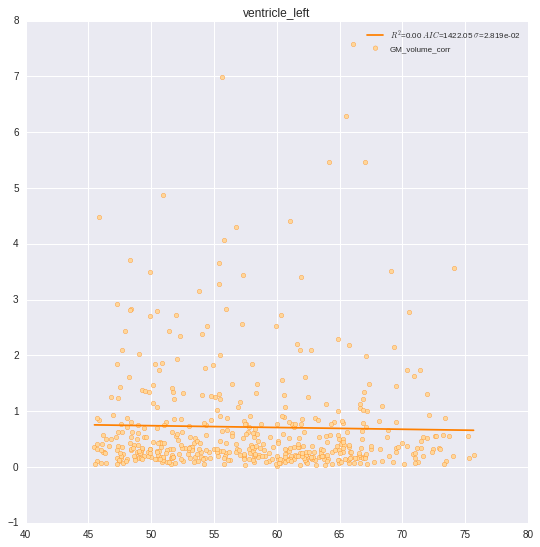

F.C.L.r.diag._left
[[ 1.         -0.17365013]
 [-0.17365013  1.        ]]


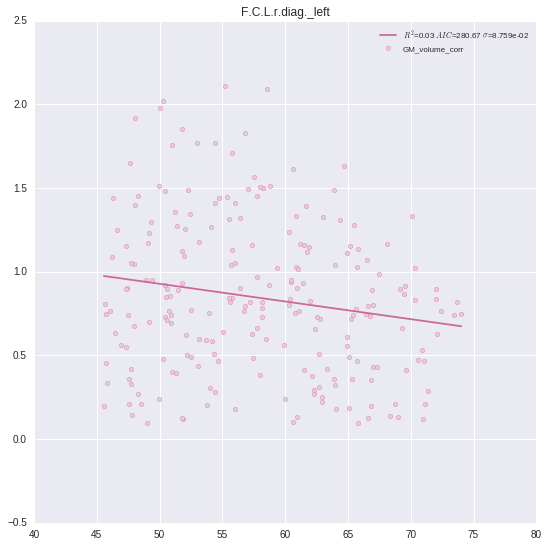

S.T.i.ant._left
[[ 1.         0.0071455]
 [ 0.0071455  1.       ]]


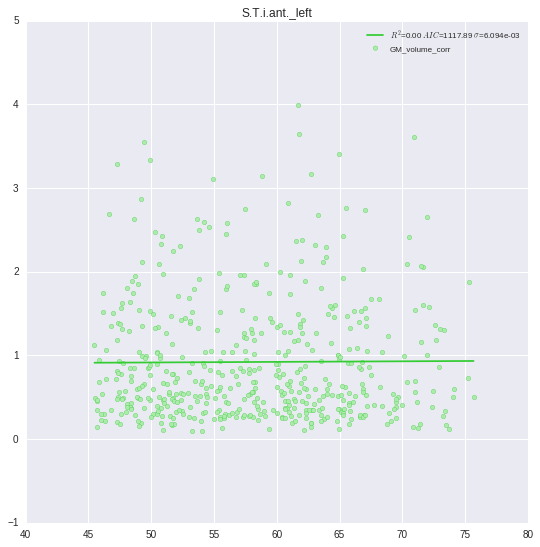

F.C.L.r.ant._left


IndexError: list index out of range

In [58]:
edgecolors = ['#800000','#003366','#ff8000','#cc6699','#33cc33']
facecolors = ['#ff9999','#99ccff','#ffd699','#ecc6d9','#adebad']

for i, label in enumerate(labels):
    #label = labels[0]
    fig = plt.figure(figsize=(9,9), facecolor='white')

    ax = fig.add_subplot(111)

    print label
    df = data[data['label']==label]

    ax.scatter(df['age'], df['%s_corr'%key], edgecolors=edgecolors[i], facecolors=facecolors[i])
    # Fits a line on the group data
    x = pd.DataFrame({'age': np.linspace(df['age'].min(), df['age'].max(), 100)})
    poly = ols(formula='%s_corr~1+age'%key, data=df).fit()
    ypred = poly.predict(x)

    # Draws the fitted line
    ax.plot(x['age'], ypred, linestyle='-',
            label='$R^2$=%.2f $AIC$=%.2f $\sigma$=%.3e'
             % (poly.rsquared, poly.aic, np.std(ypred)),
            alpha=1.0, color=edgecolors[i])
    ax.legend(prop={'size':8})
    print np.corrcoef(df['age'], df['%s_corr'%key])
    ax.set_title(str(label))
    #ax.text(0.15, 0.95, label, horizontalalignment='center',
    #    verticalalignment='center', transform = ax.transAxes
    #    )
    
    plt.show()
